In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten

In [2]:
from keras.preprocessing import image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X_train = np.loadtxt('C:/Users/OM/Downloads/input.csv', delimiter = ',')
Y_train = np.loadtxt('C:/Users/OM/Downloads/labels.csv', delimiter = ',')

X_test = np.loadtxt('C:/Users/OM/Downloads/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('C:/Users/OM/Downloads/labels_test.csv', delimiter = ',')

In [5]:
X_train.shape              

(2000, 30000)

In [6]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


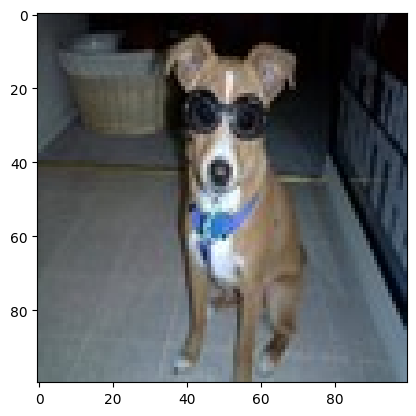

In [8]:
import random
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
plt.show()

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 128)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5075 - loss: 0.7401
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 568ms/step - accuracy: 0.5655 - loss: 0.6843
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6550 - loss: 0.6508
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6990 - loss: 0.5933
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7215 - loss: 0.5470


In [12]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6525 - loss: 0.6197


[0.619670033454895, 0.6524999737739563]

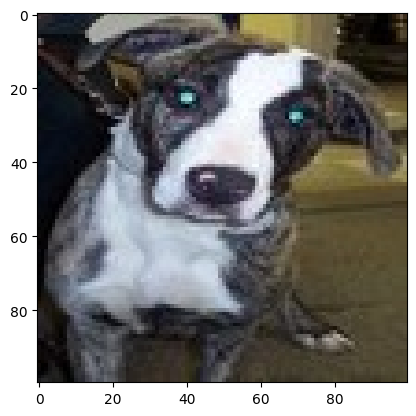

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Our model says it is a : dog


In [13]:
ind=random.randint(0,len(Y_test))
image=X_test[ind]
plt.imshow(image)
plt.show()


prediction = model.predict(X_test[ind].reshape(1, 100, 100, 3))
prediction = prediction > 0.5

if(prediction == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

# Using Mnsit dataset


In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import keras 
import random

In [15]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

In [16]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [18]:
#normalize the RGB codes by dividng it to the max RGB value
x_train=x_train/255
x_test=x_test/255
print('shape of Training;',x_train.shape)
print('shape of Testing|;',x_test.shape)

shape of Training; (60000, 28, 28, 1)
shape of Testing|; (10000, 28, 28, 1)


In [19]:
# defining the Models Architecture
model=Sequential()

model.add(Conv2D(28,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(28,(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 28)          │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 28)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 700)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 200)                 │         140,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,574 (584.27 KB)

 Trainable params: 149,574 (584.27 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 64ms/step - accuracy: 0.9469 - loss: 0.1712 - val_accuracy: 0.9840 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 125s 55ms/step - accuracy: 0.9827 - loss: 0.0566 - val_accuracy: 0.9877 - val_loss: 0.0310
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 25ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9891 - val_loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9919 - val_loss: 0.0249


In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss: %.3f' %test_loss)
print('Accuracy: %.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9919 - loss: 0.0249
Loss: 0.025
Accuracy: 0.992


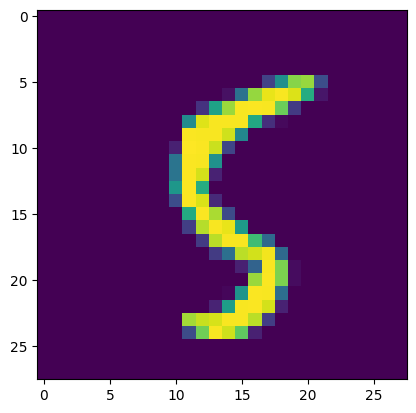

In [23]:
ind=random.randint(0,len(Y_test))
image=x_test[ind]
plt.imshow(image)
plt.show()

In [24]:
image.shape

(28, 28, 1)

In [27]:
prediction=model.predict(x_test[ind].reshape(1,28,28,1))
print("predicted Value is : ", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
predicted Value is :  5
